Turning Images into arrays

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

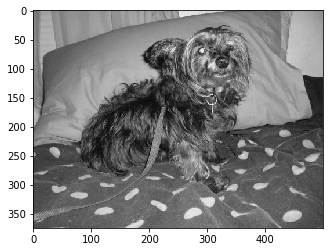

In [7]:
data_dir = "C:/Users/Steven/Desktop/TensorFlow/Data/PetImages"
categories = ["Dog", "Cat"]

for category in categories:
    path = os.path.join(data_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

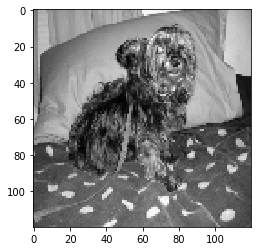

In [69]:
# Changing Pixels

img_size = 120
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap='gray')
plt.show()

In [70]:
training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [71]:
print(len(training_data))

24946


In [72]:
import random

random.shuffle(training_data)

In [73]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
0
1
1
1
0
0
1


In [74]:
X = []
y = []

In [75]:
for features, label in training_data:
    X.append(features)
    y.append(label)

# reshape (-1, IMG_SIZE, IMG_SIZE, number of colors)
X = np.array(X).reshape(-1, img_size, img_size, 1)

In [76]:
# Saving your data
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

Use CNN to make a classifier with images

In [77]:
# Convulational Neural Networks

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

# Load Saved Data
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

#X = tf.keras.utils.normalize(X, axis=1)
X = X/255.0

In [78]:

model = Sequential()
model.add(Conv2D((64), (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D((64), (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

model.fit(X, np.array(y), batch_size=32, epochs=3, validation_split=.1)

Epoch 1/3
702/702 [==============================] - 372s 530ms/step - loss: 0.6747 - accuracy: 0.6122 - val_loss: 0.6230 - val_accuracy: 0.6673
Epoch 2/3
702/702 [==============================] - 335s 477ms/step - loss: 0.5918 - accuracy: 0.6913 - val_loss: 0.5566 - val_accuracy: 0.7259
Epoch 3/3
702/702 [==============================] - 621s 885ms/step - loss: 0.5121 - accuracy: 0.7537 - val_loss: 0.5159 - val_accuracy: 0.7531


75% Accuracy is a good classification model for these images, and we can expect to get better as we increase the number of epochs.